In [7]:
!pip install kaggle

In [8]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [9]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 90% 147M/163M [00:00<00:00, 248MB/s]
100% 163M/163M [00:00<00:00, 240MB/s]


In [10]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
!ls


data  face-mask-dataset.zip  sample_data


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [13]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1959.jpg', 'with_mask_1856.jpg', 'with_mask_2349.jpg', 'with_mask_1527.jpg', 'with_mask_2289.jpg']
['with_mask_641.jpg', 'with_mask_630.jpg', 'with_mask_910.jpg', 'with_mask_843.jpg', 'with_mask_1481.jpg']


In [14]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1257.jpg', 'without_mask_3106.jpg', 'without_mask_3617.jpg', 'without_mask_1705.jpg', 'without_mask_494.jpg']
['without_mask_3530.jpg', 'without_mask_462.jpg', 'without_mask_2976.jpg', 'without_mask_2570.jpg', 'without_mask_3309.jpg']


In [15]:
print("no of ppl with mask imags",len(with_mask_files))
print("no of ppl without mask images",len(without_mask_files))

no of ppl with mask imags 3725
no of ppl without mask images 3828


with mask->1 without mask->0

In [1]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [2]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


displayingimages

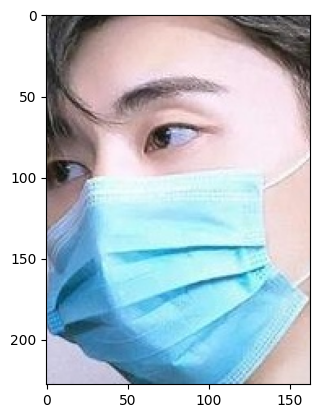

In [16]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

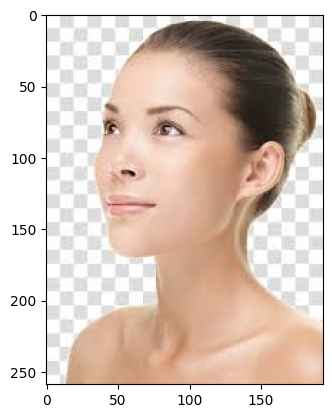

In [17]:

img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')

imgplot = plt.imshow(img)
plt.show()

In [23]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [24]:
type(data)

list

In [25]:
len(data)

7553

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
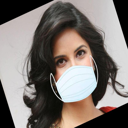

In [26]:
data[0]

In [27]:
type(data[0])

numpy.ndarray

In [28]:
X=np.array(data)
Y=np.array(labels)

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [33]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[228, 228, 226],
        [205, 205, 203],
        [205, 205, 203],
        ...,
        [102, 134, 163],
        [ 67, 118, 169],
        [ 71, 121, 172]],

       [[229, 229, 227],
        [206, 206, 204],
        [206, 206, 204],
        ...,
        [103, 135, 164],
        [ 68, 118, 170],
        [ 72, 122, 173]],

       [[230, 230, 228],
        [207, 207, 205],
        [207, 207, 205],
        ...,
        [103, 135, 164],
        [ 69, 119, 171],
        [ 74, 124, 175]],

       ...,

       [[210, 208, 206],
        [236, 239, 236],
        [234, 233, 231],
        ...,
        [174, 181, 179],
        [177, 182, 182],
        [169, 171, 170]],

       [[210, 208, 206],
        [236, 239, 236],
        [234, 233, 231],
        ...,
        [169, 175, 175],
        [174, 179, 179],
        [181, 185, 184]],

       [[210, 208, 206],
        [236, 239, 236],
        [234, 232, 231],
        ...,
        [169, 170, 169],
        [171, 174, 172],
        [169, 175, 173]]], dtype=uint8)
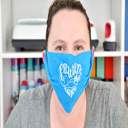

In [34]:
X_train[0]

In [35]:
X_train_scaled[0]

array([[[0.89411765, 0.89411765, 0.88627451],
        [0.80392157, 0.80392157, 0.79607843],
        [0.80392157, 0.80392157, 0.79607843],
        ...,
        [0.4       , 0.5254902 , 0.63921569],
        [0.2627451 , 0.4627451 , 0.6627451 ],
        [0.27843137, 0.4745098 , 0.6745098 ]],

       [[0.89803922, 0.89803922, 0.89019608],
        [0.80784314, 0.80784314, 0.8       ],
        [0.80784314, 0.80784314, 0.8       ],
        ...,
        [0.40392157, 0.52941176, 0.64313725],
        [0.26666667, 0.4627451 , 0.66666667],
        [0.28235294, 0.47843137, 0.67843137]],

       [[0.90196078, 0.90196078, 0.89411765],
        [0.81176471, 0.81176471, 0.80392157],
        [0.81176471, 0.81176471, 0.80392157],
        ...,
        [0.40392157, 0.52941176, 0.64313725],
        [0.27058824, 0.46666667, 0.67058824],
        [0.29019608, 0.48627451, 0.68627451]],

       ...,

       [[0.82352941, 0.81568627, 0.80784314],
        [0.9254902 , 0.9372549 , 0.9254902 ],
        [0.91764706, 0

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [41]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - acc: 0.7081 - loss: 0.6386 - val_acc: 0.7917 - val_loss: 0.3980
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - acc: 0.8761 - loss: 0.3144 - val_acc: 0.8926 - val_loss: 0.2424
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9094 - loss: 0.2445 - val_acc: 0.9355 - val_loss: 0.1901
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9274 - loss: 0.1831 - val_acc: 0.9074 - val_loss: 0.2373
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9299 - loss: 0.1837 - val_acc: 0.9355 - val_loss: 0.1850


In [42]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print(accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9173 - loss: 0.1963
0.9199205636978149


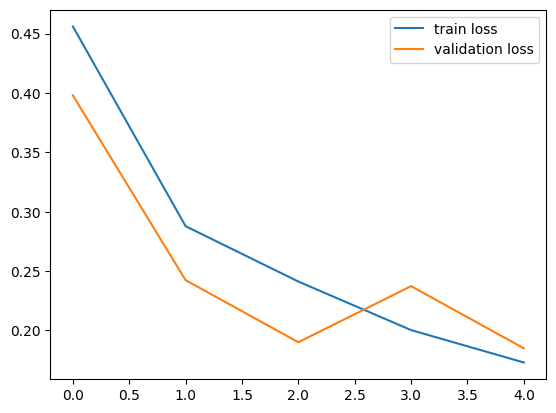

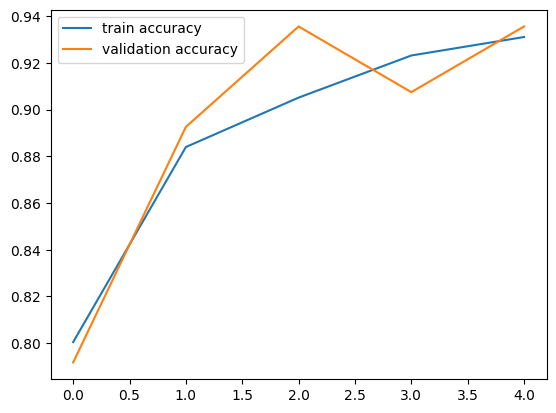

In [43]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')
